<a href="https://colab.research.google.com/github/pranavmp-10-000/CassavaDiseaseClassification/blob/main/cassavaclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Data Import

In [1]:
! pip install kaggle

In [2]:
from google.colab import files

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!mkdir /content/data

In [ ]:
!kaggle competitions files cassava-leaf-disease-classification

In [8]:
!kaggle competitions download -c cassava-leaf-disease-classification -p /content/data -f /train.csv

404 - Not Found


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import glob
from functools import partial
import IPython.display as display
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/data/train.csv


In [ ]:
!unzip data/\*.zip -d /content/data

unzip:  cannot find or open data/*.zip, data/*.zip.zip or data/*.zip.ZIP.

No zipfiles found.


In [10]:
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError: # no TPU found, detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
GCS_PATH = 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc'
IMAGE_SIZE = [512,512]

In [12]:
train_records = pd.read_csv('/content/data/train.csv')
#test_records = pd.read_csv('../input/cassava-leaf-disease-classification/test.csv')
train_records.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [13]:
data_value_c = pd.DataFrame(train_records['label'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


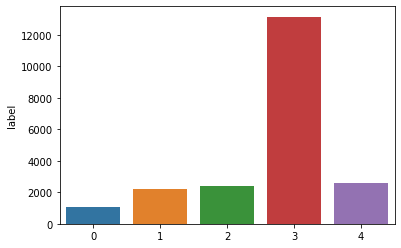

In [14]:
sns.barplot(data_value_c.index,data_value_c.label)

In [15]:
class_weights = train_records.groupby(['label']).count()
class_weights['image_id'] = class_weights.image_id/train_records.shape[0]

In [16]:
cl_w = class_weights.image_id.to_dict()

In [17]:
TRAIN_DIRECTORY = '/content/data/'
#TEST_DIRECTORY = '../input/cassava-leaf-disease-classification/test_images/'

In [18]:
def submit_gen(model,classes,dataset_path,col='image_id'):
  test_data = os.listdir(dataset_path)
  pred_array=[]
  for i in test_data:
    img = tf.keras.preprocessing.image.load_img(
        dataset_path+i,target_size=(512,512))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = np.squeeze(model.predict(img_array))
    name_c = classes[np.argmax(prediction)]
    pred_array.append(name_c)
  return pred_array,test_data

In [19]:
gs_filenames = tf.io.gfile.glob(GCS_PATH + "/train_tfrecords/*.tfrec")
gs_filenames

['gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train00-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train01-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train02-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train03-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train04-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train05-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train06-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train07-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d5a795bc43d1fb6e4a1b250fcc1ef4954a9f9afc/train_tfrecords/ld_train08-1338.tfrec',
 'gs://kds-8ce61d4a373ab9f3d

In [20]:
split_ind = int(0.9 * len(gs_filenames))
TRAINING_FILENAMES, VALID_FILENAMES = gs_filenames[:split_ind], gs_filenames[split_ind:]
dataset = tf.data.TFRecordDataset(filenames=TRAINING_FILENAMES)
val_dataset = tf.data.TFRecordDataset(filenames=VALID_FILENAMES)

In [21]:
def augment(image):
  #image = tf.keras.preprocessing.image.(image,channels=3)
  image = tf.image.random_flip_left_right(image,seed=2)
  image = tf.keras.preprocessing.image.img_to_array(image)
  #image = tf.reshape(image,(3,512,512))
  image = tf.keras.preprocessing.image.random_rotation(image,35,row_axis=1 ,col_axis=0, channel_axis=2)
  image = tf.keras.preprocessing.image.random_shear(image,5,row_axis=1 ,col_axis=0, channel_axis=2)
  image = tf.keras.preprocessing.image.random_shift(image,0.1,0.1,row_axis=1 ,col_axis=0, channel_axis=2)
  #image = tf.reshape(image,(*IMAGE_SIZE,3))
  image = tf.keras.preprocessing.image.array_to_img(image)
  return image

In [22]:
image_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'image_name': tf.io.FixedLenFeature([], tf.string),
    'target': tf.io.FixedLenFeature([], tf.int64),
    
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  example = tf.io.parse_single_example(example_proto, image_feature_description)
  image = tf.image.decode_jpeg(example['image'],channels=3)
  image = tf.cast(image, tf.float32)
  image = tf.reshape(image,[*IMAGE_SIZE,3])
  label = tf.cast(example["target"], tf.int32)
  return image,label

In [23]:
parsed_image_dataset = dataset.map(partial( _parse_image_function),num_parallel_calls=AUTOTUNE)

In [24]:
val_image_dataset = val_dataset.map(partial( _parse_image_function),num_parallel_calls=AUTOTUNE)

In [25]:
for i,x in parsed_image_dataset.take(1):
  print(i.shape)

(512, 512, 3)


In [26]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(35),
    #tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2,),
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)])

In [27]:
train_aug_ds = parsed_image_dataset.filter(lambda x,y: tf.math.not_equal(y,3))
val_aug_ds = val_image_dataset.filter(lambda x,y: tf.math.not_equal(y,3))
train_aug_ds = train_aug_ds.batch(32)
val_aug_ds = val_aug_ds.batch(32)
train_aug_ds = train_aug_ds.map(lambda x,y:(data_augmentation(x),y))
val_aug_ds = val_aug_ds.map(lambda x,y:(data_augmentation(x),y))
for i,x in train_aug_ds.take(1):
  print(i.shape)


(32, 512, 512, 3)


In [28]:
aug_train_ds =train_aug_ds.unbatch()
aug_val_ds = val_aug_ds.unbatch()
parsed_image_dataset = parsed_image_dataset.concatenate(aug_train_ds)
val_image_dataset = val_image_dataset.concatenate(aug_val_ds)

In [29]:
def create_dataset(dataset):    
    # Set the number of datapoints you want to load and shuffle 
    dataset = dataset.shuffle(2048)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    # Set the batchsize
    dataset = dataset.batch(64)

    return dataset

In [30]:
train_dataset = create_dataset(parsed_image_dataset)
validation_dataset = create_dataset(val_image_dataset)

# Preprocessing - Tensorflow

In [ ]:
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
      horizontal_flip=True,
      #width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.3,
      rescale=1./255, validation_split=.1,
      )
train_generator = datagen_train.flow_from_directory(
    train_dataset., shuffle=True,subset='training')

In [ ]:
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=40,
      horizontal_flip=True,
      #width_shift_range=0.2, height_shift_range=0.2,
      #shear_range=0.2, zoom_range=0.2,
      rescale=1./255, validation_split=.1,
      )
val_generator = datagen_val.NumpyArrayIterator(
    TRAIN_IMAGE_DIRECTORY,target_size=(256,256), shuffle=True,subset='validation',class_mode='sparse')

# Model - Tensorflow

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(35),
  tf.keras.layers.experimental.preprocessing.RandomZoom(
    height_factor=0.2,),
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255
    )
  
])

### Pretrained Model

In [31]:
with strategy.scope():
    base = tf.keras.applications.EfficientNetB5(include_top=False,input_shape=(*IMAGE_SIZE,3),
                                                weights='imagenet')
    base.trainable = False
    inputs = tf.keras.layers.Input([*IMAGE_SIZE, 3])
    pre_layer = tf.keras.applications.efficientnet.preprocess_input(inputs)#.get_layer(
    base_model = base(pre_layer)
    base_model = tf.keras.layers.Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.BatchNormalization()(base_model)
    base_model = tf.keras.layers.Flatten()(base_model)
    base_model = tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(128,activation='relu')(base_model)
    base_model = tf.keras.layers.Dense(64,activation='relu',)(base_model)
    base_model = tf.keras.layers.Dense(32,activation='relu',)(base_model)
    base_model = tf.keras.layers.Dense(8,activation='relu',)(base_model)
    base_model = tf.keras.layers.Dropout(0.2)(base_model)
    base_model = tf.keras.layers.Dense(5,activation='softmax')(base_model)
    
    model_efficient_net = tf.keras.Model(inputs=inputs,outputs=base_model)



115269632/115263384 [==============================] - 1s 0us/step


In [32]:
base.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 512, 512, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 513, 513, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [33]:
model_efficient_net.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
efficientnetb5 (Functional)  (None, 16, 16, 2048)      28513527  
_________________________________________________________________
dense (Dense)                (None, 16, 16, 1024)      2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 16, 16, 512)       524800    
_________________________________________________________________
dense_2 (Dense)              (None, 16, 16, 256)       131328    
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 256)       1024      
_________________________________________________________________
flatten (Flatten)            (None, 65536)            

In [34]:
model_efficient_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [35]:
initial_learning_rate_e = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_e, decay_steps=100, decay_rate=0.96, staircase=True
)

checkpoint_cb_e = tf.keras.callbacks.ModelCheckpoint(
    "efficient_net_best_model.h5", save_best_only=True
)

early_stopping_cb_e = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [ ]:
epochs=50
history = model_efficient_net.fit(
  train_dataset,
  epochs=epochs,
  validation_data = validation_dataset,
  callbacks=[checkpoint_cb_e, early_stopping_cb_e]
  #class_weight = cl_w
  #steps_per_epoch = 600
  #validation_data = val_generator,

 
)

Epoch 1/50
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


406/406 [==============================] - 177s 436ms/step - loss: 23.0124 - accuracy: 0.5270 - val_loss: 12.3324 - val_accuracy: 0.6046
Epoch 2/50
406/406 [==============================] - 97s 240ms/step - loss: 7.8365 - accuracy: 0.5836 - val_loss: 4.7816 - val_accuracy: 0.6189
Epoch 3/50
406/406 [==============================] - 99s 244ms/step - loss: 3.5111 - accuracy: 0.6028 - val_loss: 2.4917 - val_accuracy: 0.6324
Epoch 4/50
406/406 [==============================] - 98s 243ms/step - loss: 2.0930 - accuracy: 0.6081 - val_loss: 1.6751 - val_accuracy: 0.6246
Epoch 5/50
406/406 [==============================] - 98s 240ms/step - loss: 1.5475 - accuracy: 0.6146 - val_loss: 1.3327 - val_accuracy: 0.6522
Epoch 6/50
406/406 [==============================] - 98s 241ms/step - loss: 1.3052 - accuracy: 0.6159 - val_loss: 1.1506 - val_accuracy: 0.6527
Epoch 7/50
406/406 [==============================] - 98s 241ms/step - loss: 1.1846 - accuracy: 0.6231 - val_loss: 1.0504 - val_accuracy: 

In [ ]:
model_efficient_net.save('effecienetcustom_B4_model.h5')

### Custom Model

In [ ]:
with strategy.scope():
  conv_5d = tf.keras.Sequential([tf.keras.layers.Input([*IMAGE_SIZE,3]),
                               tf.keras.layers.Conv2D(256,3,activation='relu',kernel_regularizer='l2'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(128,3,activation='relu',kernel_regularizer='l2'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128,activation='relu'),
                               tf.keras.layers.Dense(64,activation='relu')
                               
])
  conv_3d = tf.keras.Sequential([tf.keras.layers.Input([*IMAGE_SIZE,3]),
                               tf.keras.layers.Conv2D(256,2,activation='relu',kernel_regularizer='l2'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(128,2,activation='relu',kernel_regularizer='l2'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(256,activation='relu'),
                               tf.keras.layers.Dense(128,activation='relu')
                               
])
  
  inputs = tf.keras.layers.Input([*IMAGE_SIZE, 3])
  conv5d = conv_5d(inputs)
  conv3d = conv_3d(inputs)
  split_base = tf.keras.layers.Average()([conv5d,conv3d])
  #split_base = tf.keras.layers.Average()(split_base)
  split_base_model = tf.keras.layers.BatchNormalization()(split_base_model)
  split_base_model = tf.keras.layers.Flatten()(split_base_model)
  split_base_model = tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(split_base_model)
  split_base_model = tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(split_base_model)
  split_base_model = tf.keras.layers.Dense(128,activation='relu')(split_base_model)
  split_base_model = tf.keras.layers.Dense(64,activation='relu',)(split_base_model)
  split_base_model = tf.keras.layers.Dense(32,activation='relu',)(split_base_model)
  split_base_model = tf.keras.layers.Dense(8,activation='relu',)(split_base_model)
  split_base_model = tf.keras.layers.Dropout(0.2)(split_base_model)
  split_base_model = tf.keras.layers.Dense(5,activation='softmax')(split_base_model)
  
  model_custom = tf.keras.Model(inputs=inputs,outputs=split_base_model)

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.96, staircase=True
)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5", save_best_only=True
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [ ]:
model_custom.summary()

Model: "functional_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
sequential_19 (Sequential)      (None, 128)          368128      input_38[0][0]                   
__________________________________________________________________________________________________
sequential_20 (Sequential)      (None, 128)          200448      input_38[0][0]                   
__________________________________________________________________________________________________
average_5 (Average)             (None, 128)          0           sequential_19[0][0]              
                                                                 sequential_20[0][0]  

In [ ]:
model_custom.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model_custom.fit(
  train_dataset,
  epochs=epochs,
  validation_data = validation_dataset,
  callbacks=[checkpoint_cb, early_stopping_cb]
  #class_weight = cl_w
  #steps_per_epoch = 600
  #validation_data = val_generator,

 
)

In [ ]:
model_custom.optimizer._decayed_lr(tf.float32).numpy()

In [ ]:
model_custom.save('effecienetcustom_B4_model.h5')

# Prediction

In [ ]:
prediction,test_data = submit_gen(model_custom,
                                  classes=sorted(train_records.label.unique()),
                                  dataset_path='/content/test/')

In [ ]:
test_data

['2216849948.jpg']

In [ ]:
submission = pd.DataFrame({"image_id":np.squeeze(test_data),"label":prediction})
submission.head()

,image_id,label
0,2216849948.jpg,2


In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
model_res.save('initial_model.h5')

In [ ]:
!rm -R ./data_train